In [2]:
import pandas
import numpy
import dtw
from scipy.stats import poisson, norm
import time
import seaborn as sns

In [274]:
simulated_curves = []
for i in range(100):
    new_curve = []
    for n in lc1[0]:
        new_curve.append(poisson.rvs(mu = n, size = 1)[0])
    simulated_curves.append(new_curve)

In [275]:
start_time = time.time()
dtw_list = []
for curve in simulated_curves:
    d, *a= dtw(n1, curve, dist = manhattan_distance)
    dtw_list.append(d)
end_time = time.time()
print(f'Total time = {end_time - start_time}')

Total time = 0.35500001907348633


779.28 113.24717038407626


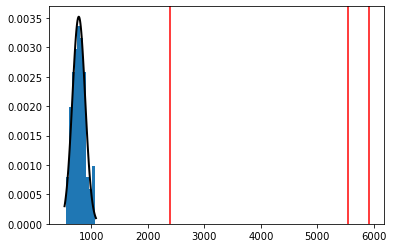

In [281]:
mu, std = norm.fit(dtw_list)
print(mu, std)
plt.hist(dtw_list, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(d1, color='red')
plt.axvline(d2, color='red')
plt.axvline(d3, color='red')